In [1]:
import numpy as np
import pandas as pd

import os
print(os.listdir("../input"))

import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

['cell-images-for-detecting-malaria']


In [2]:
parasitized_data = os.listdir('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/')

uninfected_data = os.listdir('../input/cell-images-for-detecting-malaria/cell_images/Uninfected/')

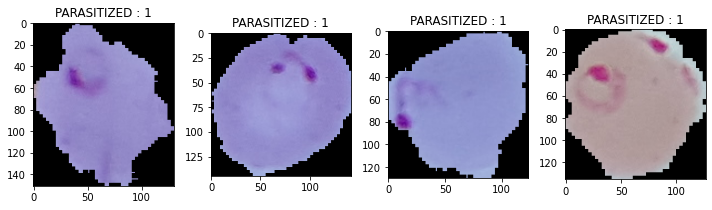

In [3]:
plt.figure(figsize = (10,10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/'+parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

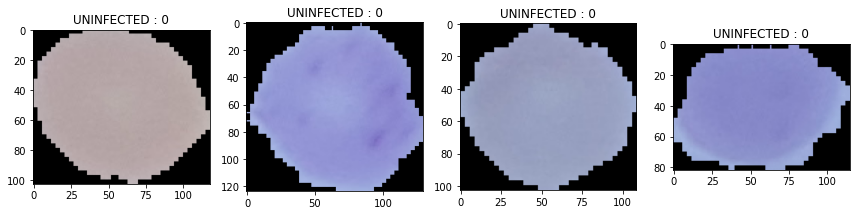

In [4]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../input/cell-images-for-detecting-malaria/cell_images/Uninfected/'+ uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [9]:
# Added an exception to handle Thumbs.db file

data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/'+ img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('../input/cell-images-for-detecting-malaria/cell_images/Uninfected/'+ img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

In [10]:
image_data = np.array(data)
labels = np.array(labels)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


In [12]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [13]:
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        1

In [14]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [15]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
689/689 [==============================] - 10s 5ms/step - loss: 0.7920 - accuracy: 0.6814
Epoch 2/20
689/689 [==============================] - 3s 5ms/step - loss: 0.2290 - accuracy: 0.9148
Epoch 3/20
689/689 [==============================] - 3s 5ms/step - loss: 0.1818 - accuracy: 0.9378
Epoch 4/20
689/689 [==============================] - 3s 5ms/step - loss: 0.1745 - accuracy: 0.9397
Epoch 5/20
689/689 [==============================] - 3s 5ms/step - loss: 0.1612 - accuracy: 0.9453
Epoch 6/20
689/689 [==============================] - 4s 5ms/step - loss: 0.1521 - accuracy: 0.9492
Epoch 7/20
689/689 [==============================] - 3s 5ms/step - loss: 0.1558 - accuracy: 0.9479
Epoch 8/20
689/689 [==============================] - 3s 5ms/step - loss: 0.1554 - accuracy: 0.9479
Epoch 9/20
689/689 [==============================] - 3s 5ms/step - loss: 0.1447 - accuracy: 0.9526
Epoch 10/20
689/689 [==============================] - 3s 5ms/step - loss: 0.1445 - accuracy: 0.952

In [16]:
predictions = model.evaluate(x_test, y_test)
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

173/173 [==============================] - 1s 3ms/step - loss: 0.1477 - accuracy: 0.9548
LOSS : 0.14766940474510193
ACCURACY : 0.9548258185386658


## Applying Data Augmentation on the training dataset

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [20]:
model_aug = CNNbuild(height = height, width = width, classes = classes, channels = channels)
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

h_aug = model_aug.fit(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 20)

Epoch 1/20
344/344 [==============================] - 20s 55ms/step - loss: 1.0135 - accuracy: 0.5757
Epoch 2/20
344/344 [==============================] - 19s 56ms/step - loss: 0.6361 - accuracy: 0.6603
Epoch 3/20
344/344 [==============================] - 20s 57ms/step - loss: 0.4182 - accuracy: 0.8201
Epoch 4/20
344/344 [==============================] - 18s 53ms/step - loss: 0.3363 - accuracy: 0.8659
Epoch 5/20
344/344 [==============================] - 19s 56ms/step - loss: 0.3236 - accuracy: 0.8767
Epoch 6/20
344/344 [==============================] - 19s 54ms/step - loss: 0.2977 - accuracy: 0.8892
Epoch 7/20
344/344 [==============================] - 19s 56ms/step - loss: 0.2940 - accuracy: 0.8939
Epoch 8/20
344/344 [==============================] - 18s 53ms/step - loss: 0.2780 - accuracy: 0.9014
Epoch 9/20
344/344 [==============================] - 19s 56ms/step - loss: 0.2771 - accuracy: 0.8982
Epoch 10/20
344/344 [==============================] - 19s 56ms/step - loss: 0.276

In [22]:
predict = model_aug.evaluate(val_generator, steps=5)

print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

5/5 [==============================] - 0s 6ms/step - loss: 0.0990 - accuracy: 0.9750
LOSS ON TEST DATA AFTER DATA AUGMENTATION : 0.09899311512708664
ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : 0.9750000238418579
